[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/mg-poo/Introduccion/5_Poo_Proyecto/poo-experimento-solucion.ipynb)

In [2]:
!pip install python-docx

## Caso Integrador de POO: Experimento

En esta clase vamos a utilizar conceptos de POO para crear una batería de experimentos:

- Tiempo de Reacción
- Cuestionario

Para eso, tendremos una clase Sujeto con un id de sujeto, una clase abstracta Experimento de la cual heredarán las de Tiempo de Reacción y Cuestionario, y una clase para generar un Reporte.

Empezamos creando una clase para definir el *sujeto* del experimento. Con la función <code> __init__</code> vamos a definir las variables que inicializan la clase en cuestión.

In [3]:
class Sujeto():
    def __init__(self, sujeto_id, *info): #info puede recibir múltiples argumentos
        self.id = sujeto_id
        self.info = info

Veamos como funciona nuestra clase.

In [4]:
# Instanciamos
info = {'edad':22, 'fecha_nacimiento':'01-01-1998', 'años_educacion':6}
sujeto = Sujeto('123456789', info)

In [5]:
# Llamamos los atributos
print('ID:', sujeto.id)
print('Información:', sujeto.info)

ID: 123456789
Información: ({'edad': 22, 'fecha_nacimiento': '01-01-1998', 'años_educacion': 6},)


Una vez que ya contamos con sujeto. Definimos una clase para la realización del experimento.  

La clase tendrá tres métodos:
>- instruccion: dará una pauta sobre como realizar el experimento.
>- corregir_datos: toma los datos crudos y calcula un resultado
>- tomar_experimento: realizará el experimento.

In [6]:
class Experimento():
    def __init__(self, sujeto: Sujeto, consigna='atencion!', nombre='Experimento'):
        self.datos = []
        self.nombre = nombre
        self.resultados = dict()
        
    def instruccion(self):
        print(consigna)
    
    def corregir_datos(self):
        pass
    
    def tomar_experimento(self):
        pass

In [7]:
exp = Experimento(sujeto)

In [8]:
exp.nombre

'Experimento'

La clase TiempoDeReaccion hereda los metodos y atributos de la clase Experimento. Para tomar el experimento se utilizarán dos modulos/librerias: *time* y *random*. Un modulo o libreria es un paquete de funciones. 

>- Time, nos va a ayudar a calcular el tiempo durante nuestro experimento.  
>- Random, nos va a permitir generar números aleatorios.

Como contamos con funciones <code>__init__</code> muy similares podemos inicializarlas con el método <code>__super()__</code>.

Ejercicio: crear una función *tomar_experimento* que tome un experimento de reacción, recibiendo como argumento "pausa_promedio", que es promedio que demorará entre un estímulo y el siguiente.

Usando:

- La función time.time() devuelve el tiempo actual en segundos
- La función random.random() genera un número aleatorio entre 0 y 1
- La función time.sleep(s) hace una pausa de *s* segundos

La función *input()* pide una entrada al usuario, bloqueando la ejecución hasta entonces. 

In [22]:
import time
import random

In [10]:
def tomar_experimento(n_trials, pausa_promedio=10):
    pass

In [11]:
class TiempoDeReaccion(Experimento): 
    '''Hereda la clase Experimento'''
    def __init__(self, *args, nombre='Tiempo de Reacción'):
        super().__init__(*args, nombre=nombre)
    
    def corregir_datos(self):
        self.resultados['Media'] = sum(self.datos) / len(self.datos)
        self.resultados['Desvio Estandar'] = sum([(x - self.resultados['Media'])**2 for x in self.datos])

    # Usar la función tomar_experimento, esta vez con self en los argumentos
    # y guardar el resultado en self.datos
    # Al final del experimento, llamar a la función "corregir_datos"
    
    # Completar
    def tomar_experimento(self, n_trials, pausa_promedio=10):
        import time
        import random
        
        for n in range(n_trials):
            t0 = time.time() # tiempo inicial
            pausa = random.random() * pausa_promedio
            input('Apretá ENTER!')
            time.sleep(pausa)
            t1 = time.time() - t0 # diferencia de tiempo
            self.datos.append(t1)
        self.corregir_datos()
            

### Utilizando nuestra clase.

1. Generar un ID aleatorio con random.random(), quedandonos solo con la parte decimal del ID
3. Instanciar el objeto Sujeto
4. Instanciar el objeto TiempoDeReaccion con la anterior instancia.
5. Llamar el metodo tomar_experimento.
6. Llamar al atributo **datos** y **resultados** ver que contiene.

In [12]:
# Generar ID random
import random

sujeto_id = random.random()

In [13]:
# Instanciar Sujeto
sujeto = Sujeto(sujeto_id)

In [14]:
# Instanciar TiempoDeReaccion
tr = TiempoDeReaccion(sujeto)

In [15]:
# Llamar metodo tomar_experimento
tr.tomar_experimento(5, 3)

Apretá ENTER! 
Apretá ENTER! 
Apretá ENTER! 
Apretá ENTER! 
Apretá ENTER! 


¿Que datos contiene?

In [16]:
# Llamamos un atributo
tr.datos

[2.4558544158935547,
 0.5851657390594482,
 3.2840609550476074,
 2.371398448944092,
 1.0673623085021973]

In [17]:
tr.resultados

{'Media': 1.95276837348938, 'Desvio Estandar': 4.854967509464859}

## Prueba 2: Cuestionario

Generamos un cuestionario de ejemplo:

In [18]:
with open('cuestionario.txt', 'w') as out:
    out.write(
'''1. Me siento calmado.
2. Me siento seguro.
3. Estoy tenso.
4. Estoy contrariado.
5. Me siento a gusto.''')

In [19]:
class Cuestionario(Experimento):
    def __init__(self, path_cuestionario, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.cargar_preguntas(path_cuestionario)
        
    def cargar_preguntas(self, path):
        # COMPLETAR
        # Función que lee el txt y guarda cada renglón en self.preguntas
        with open(path, 'r') as f:
            preguntas = f.read().split('\n') # por renglon 
        self.preguntas = preguntas
        
    def corregir_datos(self):
        self.resultados['Total'] = sum(self.datos)
        
    def tomar_experimento(self):
        # COMPLETAR
        # Dar la instruccion
        # Para cada pregunta, hacerla con input
        # Convertir la entrada a entero
        # Guardarla en self.datos
        # Al finalizar, ejecutar corregir_datos
        self.instruccion()
        for pre in self.preguntas:
            respuesta = input(pre)
            self.datos.append(int(respuesta))
        self.corregir_datos()
        
        # Agregar un chequeo de respuesta correcta y que sea int

In [20]:
consigna = '''Aparecerán abajo algunas expresiones que las personas usan para describirse. Lea cada frase y presione el número que indique cómo se siente ahora mismo, 
siendo 0 = NO, 1 = POCO, 2 = BASTANTE, 3 = MUCHO. 
No hay contestaciones buenas o malas. No emplee mucho tiempo en cada frase, pero trate de dar la 
respuesta que mejor describa sus sentimientos ahora.
'''

stai = Cuestionario('cuestionario.txt',sujeto, consigna = consigna, nombre='Cuestionario')

In [21]:
stai.tomar_experimento()

Aparecerán abajo algunas expresiones que las personas usan para describirse. Lea cada frase y presione el número que indique cómo se siente ahora mismo, 
siendo 0 = NO, 1 = POCO, 2 = BASTANTE, 3 = MUCHO. 
No hay contestaciones buenas o malas. No emplee mucho tiempo en cada frase, pero trate de dar la 
respuesta que mejor describa sus sentimientos ahora.



1. Me siento calmado. 0
2. Me siento seguro. 2
3. Estoy tenso. 1
4. Estoy contrariado. 4
5. Me siento a gusto. 5


In [35]:
stai.resultados

{'Total': 10}

Una vez realizado el ejercicio vamos a generar una clase para realizar el reporte del experimento.

La clase Reporte va a generar un documento que contendrá: 
- Una plantilla/imagen para generar el documento; 
- Un metodo para analizar los datos resultado del experimento;
- Un metodo para crear gráficos a partir de los resultados.

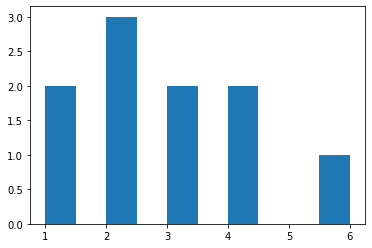

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist([1,2,3,6,4,1,2,3,2,4]);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class Reporte():
    '''Esta clase va a generar un reporte a partir de un Experimento'''
    def __init__(self, experimento: Experimento, img_path = 'tmp.png'):
        self.suj = sujeto
        self.exp = experimento
        self.img_path = img_path
    
    def crear_graficos(self):
        # Explicación Matplotlib 
        fig, ax = plt.subplots(1,2, figsize=(11,4))
        ax[0].plot(self.exp.datos)
        ax[0].set_ylabel('Error (ms)')
        ax[0].set_xlabel('Trials')
        sns.distplot(self.exp.datos, ax=ax[1])
        ax[1].set_ylabel('Frequencia')
        ax[1].set_xlabel('Error (ms)')
        return ax
        
    def generar_reporte(self):
        #https://python-docx.readthedocs.io/en/latest/
        
        from docx import Document
        from docx.shared import Cm
        
        document = Document()
        
        # Agregamos un Titulo
        document.add_heading(f'{self.exp.nombre}', 0)
        p = document.add_paragraph('ID del sujeto: ')
        p.add_run(f'{self.suj.id}').bold = True
        
        # Agregamos Resultados, podemos usar distintos estilos
        document.add_paragraph(f'Resultados', style='Intense Quote')
        
        # COMPLETAR
        # para cada dato en el diccionario de resultados,
        # agregar un parrafo con ese dato 
        for k, v in self.exp.resultados.items():
            document.add_paragraph(f'{k}= {v}', 
                                   
                                   style='List Bullet')

        # Agregamos el Grafico
        ax = self.crear_graficos()
        plt.savefig(self.img_path)
        plt.close()
        
        document.add_picture(self.img_path, width=Cm(14))
        fp = f'reporte_{self.suj.id}.docx'
        document.save(fp)
        return fp

In [ ]:
# Instanciamos
rep = Reporte(tr)

In [ ]:
# Generar reporte
fp = rep.generar_reporte()

In [41]:
rep.exp.resultados

{'Media': 1.4439297199249268, 'Desvio Estandar': 2.1900368243026835}

In [ ]:
from google.colab import files

files.download(fp)